In [ ]:
#Question 1: UBOS Multi-District Population & Growth Forecast
#Given the following dataset (Population estimates in thousands for 10 years):
#Kampala = [1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800]
#Wakiso = [950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670]
#Gulu = [320, 330, 345, 360, 375, 390, 410, 430, 455, 480]

In [1]:
#storing the data in numpy arrays
import numpy as np 

kampala = [1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800]
kampala_array = np.array(kampala)
print(kampala_array)

wakiso = [950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670]
wakiso_array = np.array(wakiso)
print(wakiso_array)

gulu = [320, 330, 345, 360, 375, 390, 410, 430, 455, 480]
gulu_array = np.array(gulu)
print(gulu_array)



[1200 1250 1300 1350 1420 1500 1580 1650 1720 1800]
[ 950 1000 1070 1150 1220 1300 1390 1480 1570 1670]
[320 330 345 360 375 390 410 430 455 480]


In [2]:
#computing mean, median variance and standard deviation
import numpy as np 
import statistics as stats

kampala = [1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800]
kampala_array = np.array(kampala)

wakiso = [950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670]
wakiso_array = np.array(wakiso)

gulu = [320, 330, 345, 360, 375, 390, 410, 430, 455, 480]
gulu_array = np.array(gulu)

def show_stats(name, data):
   print(f"\n statistics for {name}:")
   print(f"Mean: {stats.mean(data):.3f}")
   print(f"Median: {stats.median(data):.3f}")
   print(f"Variance: {stats.variance(data):.3f}")
   print(f"Standard Deviation: {stats.stdev(data):.3f}")

show_stats("kampala", kampala)
show_stats("wakiso", wakiso)
show_stats("gulu", gulu)


 statistics for kampala:
Mean: 1477.000
Median: 1460.000
Variance: 42601.111
Standard Deviation: 206.400

 statistics for wakiso:
Mean: 1280.000
Median: 1260.000
Variance: 60066.667
Standard Deviation: 245.085

 statistics for gulu:
Mean: 389.500
Median: 382.500
Variance: 2885.833
Standard Deviation: 53.720


In [4]:
# Generating a fibonacci sequence projection for each district for the next five years
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

Kampala = np.array([1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800])
Wakiso  = np.array([950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670])
Gulu    = np.array([320, 330, 345, 360, 375, 390, 410, 430, 455, 480])

districts = {"Kampala": Kampala, "Wakiso": Wakiso, "Gulu": Gulu}

def fib_sequence(n, start1=1, start2=1):
    seq = [start1, start2]
    while len(seq) < n:
        seq.append(seq[-1] + seq[-2])
    return seq[:n]

fib5 = fib_sequence(5)  # [1,1,2,3,5]
print("\nFibonacci sequence (length 5) used as growth multipliers:", fib5)

projected = {}
for name, arr in districts.items():
    last = arr[-1]
    
    increments = [last * (f * 0.01) for f in fib5]
    proj = [last + sum(increments[:i+1]) for i in range(len(increments))]
    projected[name] = np.array(proj)
    print(f"\n{name} projected (next 5 years, thousands):\n", np.round(projected[name], 2))



Fibonacci sequence (length 5) used as growth multipliers: [1, 1, 2, 3, 5]

Kampala projected (next 5 years, thousands):
 [1818. 1836. 1872. 1926. 2016.]

Wakiso projected (next 5 years, thousands):
 [1686.7 1703.4 1736.8 1786.9 1870.4]

Gulu projected (next 5 years, thousands):
 [484.8 489.6 499.2 513.6 537.6]


In [6]:
#Comparing variance actual vs projected

for name in districts:
    actual_var = stats.pvariance(list(districts[name]))
    proj_var = stats.pvariance(list(projected[name]))
    print(f"\n{name}: actual variance = {actual_var:.2f}, projected variance = {proj_var:.2f}")



Kampala: actual variance = 38341.00, projected variance = 5106.24

Wakiso: actual variance = 54060.00, projected variance = 4395.31

Gulu: actual variance = 2597.00, projected variance = 363.11


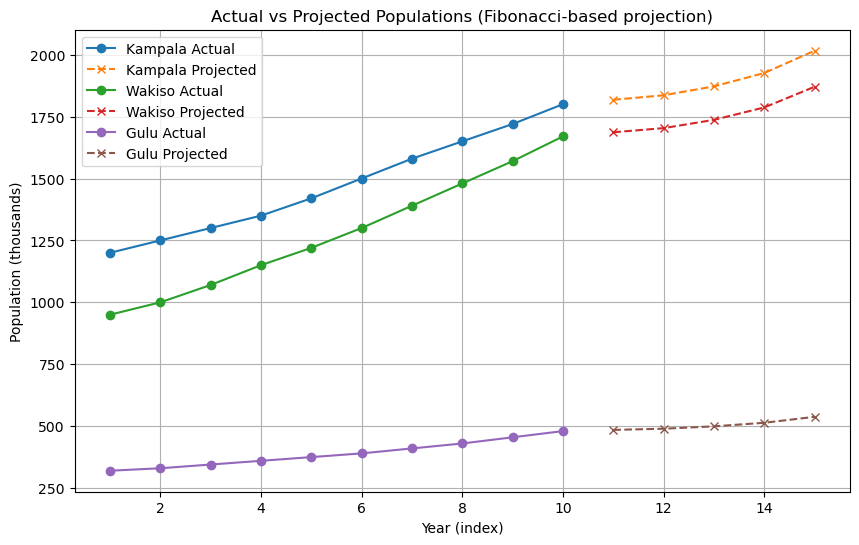

In [8]:
#ploting actual vs variance 

years_actual = np.arange(1, len(Kampala)+1)
years_proj = np.arange(len(Kampala)+1, len(Kampala)+1+len(fib5))

plt.figure(figsize=(10,6))
for name, arr in districts.items():
    plt.plot(years_actual, arr, marker='o', label=f"{name} Actual")
    plt.plot(years_proj, projected[name], marker='x', linestyle='--', label=f"{name} Projected")
plt.xlabel("Year (index)")
plt.ylabel("Population (thousands)")
plt.title("Actual vs Projected Populations (Fibonacci-based projection)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Question 2: Solar Micro-Grid Simulation
#Equations: 3x + 2y = D1 and 4x + y = D2, where x = solar panels, y = batteries.

# Prompting the user to enter daily demand values D1 and D2.
D1 = float(input("Enter daily demand value D1: "))
D2 = float(input("Enter daily demand value D2: "))


In [12]:
D1 = float(input("Enter daily demand value D1: "))
D2 = float(input("Enter daily demand value D2: "))

import numpy as np
from scipy.linalg import solve

# Coefficient matrix
A = np.array([[3, 2],
              [4, 1]])

b = np.array([D1, D2])

# Solve for x and y
x, y = solve(A, b)

print(f"Energy from solar panels (x): {x}")
print(f"Energy from batteries (y): {y}")

Enter daily demand value D1:  5
Enter daily demand value D2:  6


Energy from solar panels (x): 1.4
Energy from batteries (y): 0.4


In [13]:
#Repeating for 7 days while storing results in a NumPy array.

D1 = float(input("Enter daily demand value D1: "))
D2 = float(input("Enter daily demand value D2: "))

import numpy as np
from scipy.linalg import solve

# Coefficient matrix for the system of equations
A = np.array([[3, 2],
              [4, 1]])

# Initialize an empty list to store results for 7 days
results = []

print("Enter daily demand values for 7 days:\n")

for day in range(1, 8):
    D1 = float(input(f"Day {day} - Enter daily demand value D1: "))
    D2 = float(input(f"Day {day} - Enter daily demand value D2: "))
    
    # Solve the equations for x (solar panels) and y (batteries)
    b = np.array([D1, D2])
    x, y = solve(A, b)
    
    # Store the results
    results.append([x, y])
    
    print(f"  Solar panels (x): {x:.2f}, Batteries (y): {y:.2f}\n")

# Convert list to NumPy array
results_array = np.array(results)

print("=== Summary of Energy Production (7 Days) ===")
print("Day | Solar Panels (x) | Batteries (y)")
for day, (x, y) in enumerate(results_array, start=1):
    print(f"{day:3d} | {x:17.2f} | {y:13.2f}")

# Optional: print the final NumPy array
print("\nNumPy results array:\n", results_array)


Enter daily demand values for 7 days:



Day 1 - Enter daily demand value D1:  5
Day 1 - Enter daily demand value D2:  5


  Solar panels (x): 1.00, Batteries (y): 1.00



Day 2 - Enter daily demand value D1:  5
Day 2 - Enter daily demand value D2:  6


  Solar panels (x): 1.40, Batteries (y): 0.40



Day 3 - Enter daily demand value D1:  2
Day 3 - Enter daily demand value D2:  2


  Solar panels (x): 0.40, Batteries (y): 0.40



Day 4 - Enter daily demand value D1:  1
Day 4 - Enter daily demand value D2:  1


  Solar panels (x): 0.20, Batteries (y): 0.20



Day 5 - Enter daily demand value D1:  1
Day 5 - Enter daily demand value D2:  1


  Solar panels (x): 0.20, Batteries (y): 0.20



Day 6 - Enter daily demand value D1:  1
Day 6 - Enter daily demand value D2:  1


  Solar panels (x): 0.20, Batteries (y): 0.20



Day 7 - Enter daily demand value D1:  1
Day 7 - Enter daily demand value D2:  1


  Solar panels (x): 0.20, Batteries (y): 0.20

=== Summary of Energy Production (7 Days) ===
Day | Solar Panels (x) | Batteries (y)
  1 |              1.00 |          1.00
  2 |              1.40 |          0.40
  3 |              0.40 |          0.40
  4 |              0.20 |          0.20
  5 |              0.20 |          0.20
  6 |              0.20 |          0.20
  7 |              0.20 |          0.20

NumPy results array:
 [[1.  1. ]
 [1.4 0.4]
 [0.4 0.4]
 [0.2 0.2]
 [0.2 0.2]
 [0.2 0.2]
 [0.2 0.2]]


In [17]:
# Using the statistics to compute mean, variance, and standard deviation of solar vs battery usage
D1 = float(input("Enter daily demand value D1: "))
D2 = float(input("Enter daily demand value D2: "))

import numpy as np
from scipy.linalg import solve

# Coefficient matrix for the system
A = np.array([[3, 2],
              [4, 1]])

#Initializing list for 7 days
results = []

print("Enter daily demand values for 7 days:\n")
for day in range(1, 8):
    D1 = float(input(f"Day {day} - Enter daily demand value D1: "))
    D2 = float(input(f"Day {day} - Enter daily demand value D2: "))
    
    b = np.array([D1, D2])
    x, y = solve(A, b)
    
    results.append([x, y])
    print(f"  Solar panels (x): {x:.2f}, Batteries (y): {y:.2f}\n")

#Converting results to NumPy array
results_array = np.array(results)

#Spliting columns for solar and battery usage
solar_usage = results_array[:, 0]
battery_usage = results_array[:, 1]

#Computing statistics
solar_mean = np.mean(solar_usage)
solar_var = np.var(solar_usage, ddof=1)  # sample variance
solar_std = np.std(solar_usage, ddof=1)  # sample standard deviation

battery_mean = np.mean(battery_usage)
battery_var = np.var(battery_usage, ddof=1)
battery_std = np.std(battery_usage, ddof=1)

# Displaying results
print("=== Statistics of Energy Usage (7 Days) ===")
print(f"Solar Panels - Mean: {solar_mean:.2f}, Variance: {solar_var:.2f}, Std Dev: {solar_std:.2f}")
print(f"Batteries    - Mean: {battery_mean:.2f}, Variance: {battery_var:.2f}, Std Dev: {battery_std:.2f}")


Enter daily demand values for 7 days:



Day 1 - Enter daily demand value D1:  1
Day 1 - Enter daily demand value D2:  2


  Solar panels (x): 0.60, Batteries (y): -0.40



Day 2 - Enter daily demand value D1:  4
Day 2 - Enter daily demand value D2:  5


  Solar panels (x): 1.20, Batteries (y): 0.20



Day 3 - Enter daily demand value D1:  5
Day 3 - Enter daily demand value D2:  5


  Solar panels (x): 1.00, Batteries (y): 1.00



Day 4 - Enter daily demand value D1:  5
Day 4 - Enter daily demand value D2:  5


  Solar panels (x): 1.00, Batteries (y): 1.00



Day 5 - Enter daily demand value D1:  5
Day 5 - Enter daily demand value D2:  5


  Solar panels (x): 1.00, Batteries (y): 1.00



Day 6 - Enter daily demand value D1:  5
Day 6 - Enter daily demand value D2:  5


  Solar panels (x): 1.00, Batteries (y): 1.00



Day 7 - Enter daily demand value D1:  5
Day 7 - Enter daily demand value D2:  5


  Solar panels (x): 1.00, Batteries (y): 1.00

=== Statistics of Energy Usage (7 Days) ===
Solar Panels - Mean: 0.97, Variance: 0.03, Std Dev: 0.18
Batteries    - Mean: 0.69, Variance: 0.32, Std Dev: 0.56


In [ ]:
#Ploting daily solar vs battery usage.

Enter daily demand value D1:  1
Enter daily demand value D2:  1
Day 1 - Enter daily demand value D1:  2
Day 1 - Enter daily demand value D2:  4
Day 2 - Enter daily demand value D1:  4
Day 2 - Enter daily demand value D2:  6
Day 3 - Enter daily demand value D1:  5
Day 3 - Enter daily demand value D2:  5
Day 4 - Enter daily demand value D1:  6
Day 4 - Enter daily demand value D2:  6
Day 5 - Enter daily demand value D1:  6
Day 5 - Enter daily demand value D2:  6
Day 6 - Enter daily demand value D1:  6
Day 6 - Enter daily demand value D2:  6
Day 7 - Enter daily demand value D1:  6
Day 7 - Enter daily demand value D2:  6


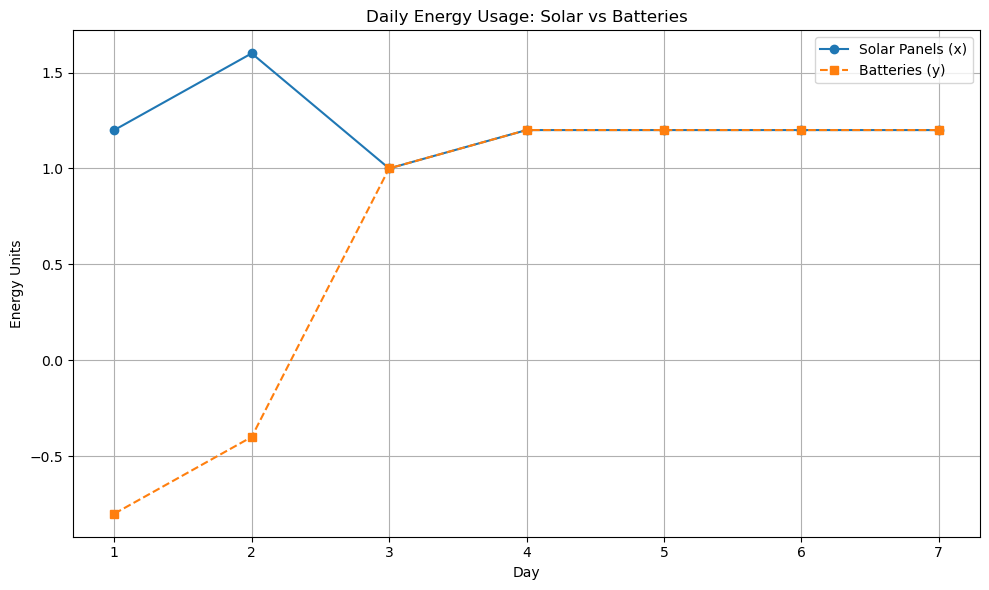

In [18]:
D1 = float(input("Enter daily demand value D1: "))
D2 = float(input("Enter daily demand value D2: "))

import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

# Coefficient matrix
A = np.array([[3, 2],
              [4, 1]])

# Collect daily results for 7 days
results = []
for day in range(1, 8):
    D1 = float(input(f"Day {day} - Enter daily demand value D1: "))
    D2 = float(input(f"Day {day} - Enter daily demand value D2: "))
    
    b = np.array([D1, D2])
    x, y = solve(A, b)
    results.append([x, y])

# Convert to NumPy array
results_array = np.array(results)
solar_usage = results_array[:, 0]
battery_usage = results_array[:, 1]

# Plot daily solar vs battery usage
days = np.arange(1, 8)

plt.figure(figsize=(10, 6))
plt.plot(days, solar_usage, marker='o', linestyle='-', label='Solar Panels (x)')
plt.plot(days, battery_usage, marker='s', linestyle='--', label='Batteries (y)')

plt.title("Daily Energy Usage: Solar vs Batteries")
plt.xlabel("Day")
plt.ylabel("Energy Units")
plt.xticks(days)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Question 3: Lake Victoria Fish Export Risk Model Attempt the following tasks

In [ ]:
#Generating 15 numbers in the Fibonacci sequence to simulate fish stock growth.
n = 15

fib_sequence = [0, 1]

#Generate the Fibonacci sequence
for i in range(2, n):
    next_number = fib_sequence[i-1] + fib_sequence[i-2]
    fib_sequence.append(next_number)

#Print the sequence
print("Fibonacci numbers simulating fish stock growth:")
print(fib_sequence)


In [ ]:
#Simulating fish prices in UGX per kg, e.g. [12000, 12500, 11800, 13000, 12800,...].
import random
import matplotlib.pyplot as plt

#Number of periods
n = 15

#Generating Fibonacci numbers for fish stock
fib_sequence = [0, 1]
for i in range(2, n):
    fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])

# Simulating fish prices in UGX per kg
base_price = 10000  # starting price in UGX
prices = []
for i in range(n):
    # Random fluctuation: ±10% of base price
    fluctuation = random.uniform(-0.1, 0.1) * base_price
    price = base_price + fluctuation
    prices.append(round(price, 0))

# Print results
print("Fish stock (Fibonacci units):", fib_sequence)
print("Simulated fish prices (UGX/kg):", prices)

# Plot stock vs prices
plt.figure(figsize=(10,6))
plt.plot(fib_sequence, label="Fish Stock (Fibonacci)")
plt.plot(prices, label="Fish Price (UGX/kg)", marker='o')
plt.xlabel("Time Period")
plt.ylabel("Stock / Price")
plt.title("Lake Victoria Fish Stock and Price Simulation")
plt.legend()
plt.grid(True)
plt.show()


Fish stock (Fibonacci units): [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
Simulated fish prices (UGX/kg): [9657.0, 10870.0, 10950.0, 9540.0, 9902.0, 9336.0, 9690.0, 10984.0, 10928.0, 10500.0, 10501.0, 9037.0, 9077.0, 9790.0, 10118.0]
Estimated daily revenue (UGX): [0.0, 10870.0, 10950.0, 19080.0, 29706.0, 46680.0, 77520.0, 142792.0, 229488.0, 357000.0, 577555.0, 804293.0, 1307088.0, 2281070.0, 3814486.0]


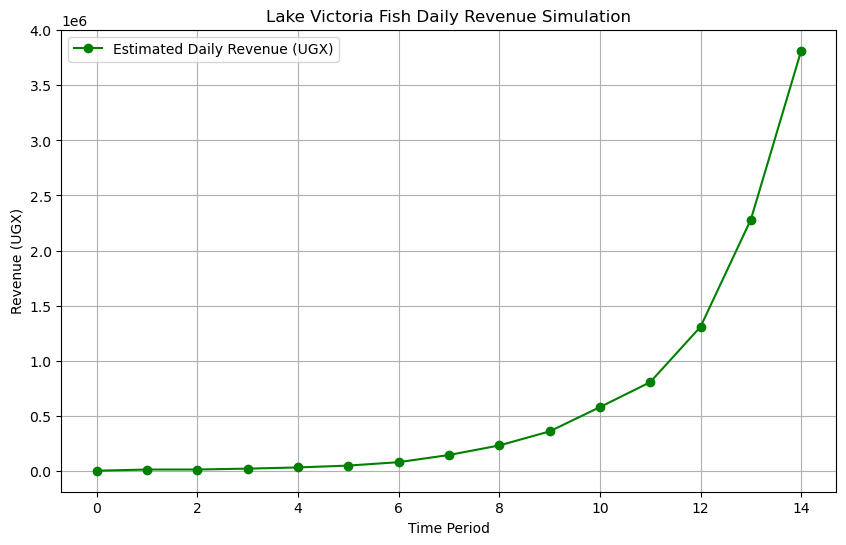

In [19]:
#Multiplying stock × price to estimate daily revenue

import random
import matplotlib.pyplot as plt

#Number of periods
n = 15

#Generating Fibonacci numbers for fish stock
fib_sequence = [0, 1]
for i in range(2, n):
    fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])

#Simulateing fish prices in UGX per kg
base_price = 10000  # starting price in UGX
prices = []
for i in range(n):
    fluctuation = random.uniform(-0.1, 0.1) * base_price  # ±10% random fluctuation
    price = base_price + fluctuation
    prices.append(round(price, 0))

#Estimating daily revenue: stock × price
revenue = [stock * price for stock, price in zip(fib_sequence, prices)]

#Print results
print("Fish stock (Fibonacci units):", fib_sequence)
print("Simulated fish prices (UGX/kg):", prices)
print("Estimated daily revenue (UGX):", revenue)

#Ploting revenue over time
plt.figure(figsize=(10,6))
plt.plot(revenue, label="Estimated Daily Revenue (UGX)", marker='o', color='green')
plt.xlabel("Time Period")
plt.ylabel("Revenue (UGX)")
plt.title("Lake Victoria Fish Daily Revenue Simulation")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#Computing mean, median, variance of revenue using statistics.

import random
import statistics
import matplotlib.pyplot as plt

#Number of periods
n = 15

#Generating Fibonacci numbers for fish stock
fib_sequence = [0, 1]
for i in range(2, n):
    fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])

#Simulating fish prices in UGX per kg
base_price = 10000  # starting price in UGX
prices = []
for i in range(n):
    fluctuation = random.uniform(-0.1, 0.1) * base_price  # ±10% random fluctuation
    price = base_price + fluctuation
    prices.append(round(price, 0))

#Estimating daily revenue: stock × price
revenue = [stock * price for stock, price in zip(fib_sequence, prices)]

#Computing statistics
mean_revenue = statistics.mean(revenue)
median_revenue = statistics.median(revenue)
variance_revenue = statistics.variance(revenue)

#Print results
print("Estimated Daily Revenue (UGX):", revenue)
print(f"Mean Revenue: {mean_revenue:.2f} UGX")
print(f"Median Revenue: {median_revenue:.2f} UGX")
print(f"Variance of Revenue: {variance_revenue:.2f} UGX^2")


Estimated Daily Revenue (UGX): [0.0, 10417.0, 9762.0, 19106.0, 28884.0, 51130.0, 84512.0, 140387.0, 223230.0, 364344.0, 549615.0, 841050.0, 1339056.0, 2448364.0, 4094597.0]
Mean Revenue: 680296.93 UGX
Median Revenue: 140387.00 UGX
Variance of Revenue: 1345293657964.21 UGX^2


In [21]:
#Printing 'High risk' if variance > 50,000, else 'Low risk'.
import random
import statistics

#Number of periods
n = 15

#Generating Fibonacci numbers for fish stock
fib_sequence = [0, 1]
for i in range(2, n):
    fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])

#Simulating fish prices in UGX per kg
base_price = 10000  # starting price in UGX
prices = []
for i in range(n):
    fluctuation = random.uniform(-0.1, 0.1) * base_price  # ±10% fluctuation
    price = base_price + fluctuation
    prices.append(round(price, 0))

#Estimating daily revenue: stock × price
revenue = [stock * price for stock, price in zip(fib_sequence, prices)]

#Computing variance
variance_revenue = statistics.variance(revenue)

#Printing revenue risk based on variance
if variance_revenue > 50000:
    print("High risk")
else:
    print("Low risk")

#Optional: print variance for reference
print(f"Variance of Revenue: {variance_revenue:.2f} UGX^2")


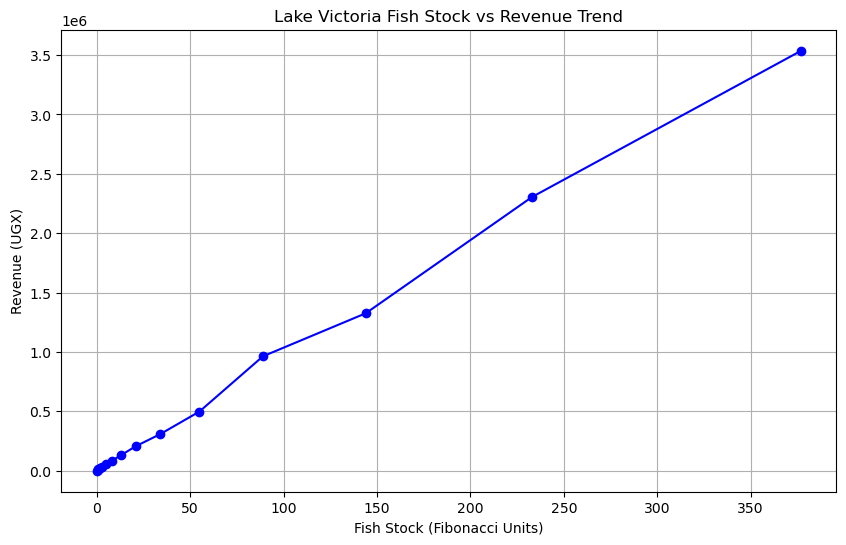

In [23]:
#Ploting fish stock vs revenue trend.

import random
import matplotlib.pyplot as plt

#Numbering of periods
n = 15

#Generating Fibonacci numbers for fish stock
fib_sequence = [0, 1]
for i in range(2, n):
    fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])

#Simulating fish prices in UGX per kg
base_price = 10000  # starting price in UGX
prices = []
for i in range(n):
    fluctuation = random.uniform(-0.1, 0.1) * base_price  # ±10% fluctuation
    price = base_price + fluctuation
    prices.append(round(price, 0))

#Estimating daily revenue: stock × price
revenue = [stock * price for stock, price in zip(fib_sequence, prices)]

#Ploting Fish Stock vs Revenue
plt.figure(figsize=(10,6))
plt.plot(fib_sequence, revenue, marker='o', linestyle='-', color='blue')
plt.xlabel("Fish Stock (Fibonacci Units)")
plt.ylabel("Revenue (UGX)")
plt.title("Lake Victoria Fish Stock vs Revenue Trend")
plt.grid(True)
plt.show()


In [ ]:
#Question 4: Weather & Agriculture Analysis

In [25]:
#storing the data in numpy arrays

import numpy as np 

kampala_weather = [120, 140, 180, 200, 220, 180, 90, 70, 60, 100, 110, 130]
kampala_array = np.array(kampala_weather)
print(kampala_array)



[120 140 180 200 220 180  90  70  60 100 110 130]
